In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import correlated_selfveto as cs
import CRFluxModels as pm
import utils
import numpy as np
import tqdm
import scipy.integrate as integrate
import scipy.interpolate as interpolate
from external import elbert,selfveto

rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size' : 18})
cols = ['#29A2C6','#FF6D31','#FFCB18','#73B66B','#EF597B', '#333333']

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18}

In [2]:
geometry=utils.Geometry(195000)
utils.overburden=geometry.overburden

In [3]:
units=cs.Units()
caca=cs.CorrelatedSelfVetoProbabilityCalculator(1)#,primary_cr_model=(pm.SimplePowerlaw27, None))

InteractionYields::_load(): Looking for /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/SIBYLL23C_yields_compact_ledpm.bz2
DecayYields:_load():: Loading file /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/decays_v1_compact.ppd

Hadrons and stable particles:

"gamma", "p", "p-bar", "n-bar", "n"

Mixed:

"pi-", "pi+", "K0L", "K-", "K+", "Lambda0", "Lambda0-bar", "K0S", 
"D+", "D-", "Ds+", "Ds-", "D0", "D0-bar"

Resonances:



Leptons:

"e-", "nue", "numu", "nutau", "antinutau", "antinumu", "antinue", "e+", 
"mu-", "mu+"

Aliases:
"obs_numu", "obs_nutau", "pr_antinutau", "pr_antinumu", "pr_antinue", "obs_antinue", "k_nue", "k_numu", 
"k_nutau", "pi_antinutau", "pi_antinue", "pi_antinumu", "pi_nue", "pi_numu", "pi_nutau", "k_antinutau", 
"k_antinumu", "k_antinue", "obs_nue", "pr_nue", "pr_numu", "pr_nutau", "obs_antinutau", "obs_antinumu", 
"k_mu-", "obs_mu-", "pr_mu+", "pi_mu+", "pi_mu-", "k_mu+", "pr_mu-", "obs_mu+"

Total number of species: 61
MCEq

## dNdEE studies

[]

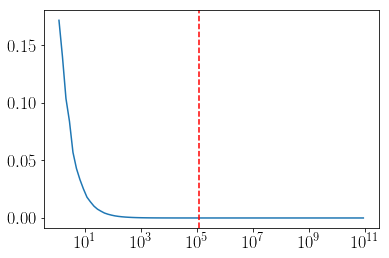

In [46]:
ipadre=40
yield_matrix=caca.mceq_run.ds.get_d_matrix(caca.ParticleProperties.pdg_id["kaon"],14)
a=np.transpose(yield_matrix)
plt.plot(e_grid,a[ipadre]/e_grid)
plt.axvline(e_grid[ipadre], color = "red", ls = "dashed")
plt.semilogx()

In [6]:
delta=np.diff(e_grid)
delta=np.insert(delta,0,delta[0])

In [95]:
r_k=(0.105/caca.ParticleProperties.mass_dict["kaon"])**2
r_D=(0.105/1.869)**2

In [97]:
1/(1-r_k),1/(1-r_D)

(1.047380231946163, 1.0031661600810537)

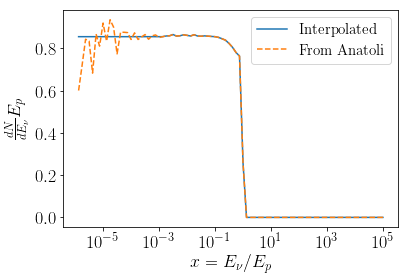

In [39]:
x_range = (e_grid/e_grid[ihijo])**-1
dNdEE = caca.mceq_run.ds.get_d_matrix(caca.ParticleProperties.pdg_id["kaon"],14)[ihijo]*e_grid/delta

dNdEE_KaonInterpolator = interpolate.interp1d(x_range[(x_range<=1.) & (x_range>=1.e-3)],
                     dNdEE[(x_range<=1.) & (x_range>=1.e-3)],
                     bounds_error = False, fill_value = (0.85511746,0.0))

plt.plot(x_range,dNdEE_KaonInterpolator(x_range), label = "Interpolated")
plt.plot(x_range,dNdEE, ls = "dashed", label = "From Anatoli")
plt.semilogx()
plt.xlabel(r"$x=E_\nu/E_p$")
plt.ylabel(r"$ \frac{dN}{dE_\nu} E_p$")
plt.legend(loc="upper right", fontsize = 15)

In [ ]:
ihijo = 20
(e_grid/e_grid[ihijo])**-1,
         caca.mceq_run.ds.get_d_matrix(caca.ParticleProperties.pdg_id["kaon"],14)[ihijo]*e_grid/delta

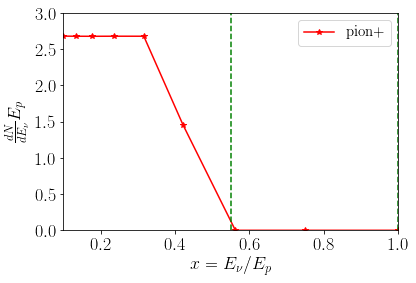

In [199]:
ihijo = 30
plt.plot((e_grid/e_grid[ihijo])**-1,
         caca.mceq_run.ds.get_d_matrix(caca.ParticleProperties.pdg_id["pion"],14)[ihijo]*e_grid/delta, 
         "*",label = "pion+", color = "red", ls = "solid", )

plt.xlim(0.1,1.)
plt.ylim(0,3)
#plt.semilogx()
plt.xlabel(r"$x=E_\nu/E_p$")
plt.ylabel(r"$ \frac{dN}{dE_\nu} E_p$")
#plt.title(r"$E_\nu$ = "+"{:.3e}".format(e_grid[ihijo]/1.e3)+" TeV")
plt.axvline(1., color = "green", ls = "dashed")
plt.axvline(0.55, color = "green", ls = "dashed")
plt.legend(loc="upper right", fontsize = 15)

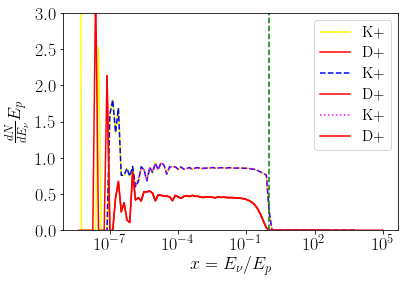

In [7]:
ihijo = 20
plt.plot((e_grid/e_grid[ihijo])**-1,
         caca.mceq_run.ds.get_d_matrix(caca.ParticleProperties.pdg_id["kaon"],14)[ihijo]*e_grid/delta, 
         label = "K+", color = "yellow", ls = "solid")
plt.plot((e_grid/e_grid[ihijo])**-1,
         caca.mceq_run.ds.get_d_matrix(411,14)[ihijo]*e_grid/delta, color = "red", label = "D+")

ihijo = 30
plt.plot((e_grid/e_grid[ihijo])**-1,
         caca.mceq_run.ds.get_d_matrix(caca.ParticleProperties.pdg_id["kaon"],14)[ihijo]*e_grid/delta,
         label = "K+", color = "blue", ls = "dashed")
plt.plot((e_grid/e_grid[ihijo])**-1,
         caca.mceq_run.ds.get_d_matrix(411,14)[ihijo]*e_grid/delta, color = "red", label = "D+")

ihijo = 40
plt.plot((e_grid/e_grid[ihijo])**-1,
         caca.mceq_run.ds.get_d_matrix(caca.ParticleProperties.pdg_id["kaon"],14)[ihijo]*e_grid/delta, 
         label = "K+", color = "magenta", ls = "dotted")
plt.plot((e_grid/e_grid[ihijo])**-1,
         caca.mceq_run.ds.get_d_matrix(411,14)[ihijo]*e_grid/delta, color = "red", label = "D+")
plt.ylim(0,3)
plt.semilogx()
plt.xlabel(r"$x=E_\nu/E_p$")
plt.ylabel(r"$ \frac{dN}{dE_\nu} E_p$")
#plt.title(r"$E_\nu$ = "+"{:.3e}".format(e_grid[ihijo]/1.e3)+" TeV")
plt.axvline(1., color = "green", ls = "dashed")
plt.legend(loc="upper right", fontsize = 15)

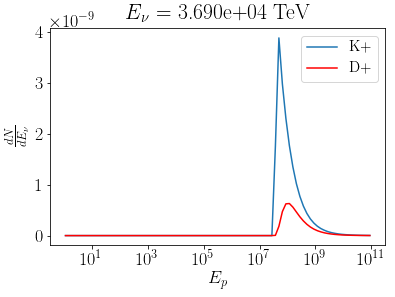

In [81]:
ihijo = 60
plt.plot(e_grid,
         caca.mceq_run.ds.get_d_matrix(caca.ParticleProperties.pdg_id["kaon"],14)[ihijo]/e_grid, label = "K+")
plt.plot(e_grid,
         caca.mceq_run.ds.get_d_matrix(411,14)[ihijo]/e_grid, color = "red", label = "D+")
plt.semilogx()
plt.xlabel(r"$E_p$")
plt.ylabel(r"$ \frac{dN}{dE_\nu}$")
plt.title(r"$E_\nu$ = "+"{:.3e}".format(e_grid[ihijo]/1.e3)+" TeV")
plt.legend(loc="upper right", fontsize = 15)

In [60]:
GetMeanMuonReachProbability(e_grid[-2],e_grid[-1],e_grid[-2],e_grid[-1],utils.overburden(1.))

0.49999999999999967

## Old scrach

In [ ]:
def GetMeanMuonReachProbability(EnuMin,EnuMax,EpMin,EpMax,ice_distance):
    return integrate.dblquad(
                             lambda Ep,Enu: caca.MuonReachProbability((Ep-Enu)*units.GeV,ice_distance),
                             EnuMin,EnuMax,
                             lambda Enu: np.max([Enu,EpMin]), lambda Enu: EpMax
                             )[0]/((EpMax-EpMin)*(EnuMax-EnuMin))
                      
def GetReachingMatrix(costh):
    ice_distance=utils.overburden(costh)
    PR_matrix=np.ones((len(e_grid),len(e_grid)))
    for ipadre in tqdm.tqdm(range(len(e_grid))):
        for ihijo in range(len(e_grid)):
            EnuMin = e_grid[ihijo-1]
            EnuMax = e_grid[ihijo]
            EpMin = e_grid[ipadre-1]
            EpMax = e_grid[ipadre]
            
            #PR_matrix[ihijo][ipadre] = 1.-caca.MuonReachProbability((e_grid[ipadre]-e_grid[ihijo])*units.GeV,ice_distance)
            PR_matrix[ihijo][ipadre] = 1. - GetMeanMuonReachProbability(EnuMin,EnuMax,EpMin,EpMax,ice_distance)
            #if ihijo < ipadre:
            #    PR_matrix[ihijo][ipadre] = 1.-caca.MuonReachProbability((e_grid[ipadre]-e_grid[ihijo])*units.GeV,ice_distance)
            #elif ihijo > ipadre:
            #    PR_matrix[ihijo][ipadre] = 0. # unphysical guy
            #elif ihijo == ipadre:
            #    continue
            #    PR_matrix[ihijo][ipadre] = 1.-caca.MuonReachProbability((e_grid[ipadre])*units.GeV,ice_distance)
    return PR_matrix

def GetPassingFraction(costh):
    caca=cs.CorrelatedSelfVetoProbabilityCalculator(costh)
    
    PR_matrix=GetReachingMatrix(costh)
    KaonToNeutrinoYield=caca.mceq_run.ds.get_d_matrix(caca.ParticleProperties.pdg_id["kaon"],14)
    rescale_kaon_decay_matrix=np.multiply(PR_matrix,KaonToNeutrinoYield)
    PionToNeutrinoYield=caca.mceq_run.ds.get_d_matrix(caca.ParticleProperties.pdg_id["pion"],14)
    rescale_pion_decay_matrix=np.multiply(PR_matrix,PionToNeutrinoYield)
    
    passing_guy_numerator = np.zeros(len(caca.mceq_run.e_grid))
    passing_guy_denominator = np.zeros(len(caca.mceq_run.e_grid))
    
    for idx,XX in enumerate(caca.Xvec):
        if(idx >= len(caca.Xvec) -1): continue
        height = caca.mceq_run.density_model.s_lX2h(np.log(caca.Xvec[idx]))*units.cm
        deltah = (caca.mceq_run.density_model.s_lX2h(np.log(caca.Xvec[idx])) -\
                  caca.mceq_run.density_model.s_lX2h(np.log(caca.Xvec[idx+1])))*Units.cm
        #if deltah>xmax:
        #    xmax=deltah
        # do for kaon
        inv_decay_length_array = (caca.ParticleProperties.mass_dict["kaon"]/caca.mceq_run.e_grid*units.GeV)*\
                                  (deltah/caca.ParticleProperties.lifetime_dict["kaon"])
        rescale_phi=inv_decay_length_array*caca.mceq_run.get_solution("K-",0,idx)

        passing_guy_numerator+=(np.dot(rescale_kaon_decay_matrix,rescale_phi))
        passing_guy_denominator+=(np.dot(KaonToNeutrinoYield,rescale_phi))

        # do for pion
        inv_decay_length_array = (caca.ParticleProperties.mass_dict["pion"]/caca.mceq_run.e_grid*units.GeV)*\
                                 (deltah/caca.ParticleProperties.lifetime_dict["pion"])
        rescale_phi=inv_decay_length_array*caca.mceq_run.get_solution("pi-",0,idx)

        passing_guy_numerator+=(np.dot(rescale_pion_decay_matrix,rescale_phi))
        passing_guy_denominator+=(np.dot(PionToNeutrinoYield,rescale_phi))
    return passing_guy_numerator/passing_guy_denominator

## Correlated Calculation

In [84]:
GetReachingYields(0,dNdEE_PionInterpolator)

100%|██████████| 88/88 [07:26<00:00,  4.30s/it]


array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          6.21316604e-11,   4.65921723e-11,   3.49392002e-11],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          6.21316604e-11,   4.65921723e-11,   3.49392002e-11],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          6.21316604e-11,   4.65921723e-11,   3.49392002e-11],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   3.34648179e-12],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [148]:
ihijo = 27; ipadre = 29;
ice_distance=utils.overburden(1.)

dNdEE_Interpolator=dNdEE_KaonInterpolator

EnuMin = e_grid[ihijo-1]
EnuMax = e_grid[ihijo]
EpMin = e_grid[ipadre-1]
EpMax = e_grid[ipadre]

print EnuMin, EnuMax, EpMin, EpMax

integrate.dblquad(
 lambda Ep,Enu: (dNdEE_Interpolator(Enu/Ep)/Ep)*(1.-caca.MuonReachProbability((Ep-Enu)*units.GeV,ice_distance)),
 EnuMin,EnuMax,
 lambda Enu: np.max([Enu,EpMin]), lambda Enu: EpMax, epsabs = 0, epsrel = 1.0e-2,
 )[0]/((EpMax-EpMin)*(EnuMax-EnuMin))

2074.82655785 2766.82568292 3689.62134723 4920.18914309


0.00013866394009136066

In [150]:
GetReachingRescaledYields(1,dNdEE_KaonInterpolator)




  0%|          | 0/88 [00:00<?, ?it/s]


  2%|▏         | 2/88 [00:00<00:07, 11.40it/s]


  3%|▎         | 3/88 [00:00<00:08,  9.76it/s]


  5%|▍         | 4/88 [00:00<00:13,  6.29it/s]


  6%|▌         | 5/88 [00:00<00:17,  4.81it/s]


  7%|▋         | 6/88 [00:01<00:16,  4.93it/s]


  8%|▊         | 7/88 [00:01<00:18,  4.40it/s]


  9%|▉         | 8/88 [00:01<00:19,  4.13it/s]


 10%|█         | 9/88 [00:01<00:19,  3.98it/s]


 11%|█▏        | 10/88 [00:02<00:17,  4.43it/s]


 12%|█▎        | 11/88 [00:02<00:16,  4.68it/s]


 14%|█▎        | 12/88 [00:02<00:15,  4.94it/s]


 15%|█▍        | 13/88 [00:02<00:14,  5.06it/s]


 16%|█▌        | 14/88 [00:02<00:14,  5.06it/s]


 17%|█▋        | 15/88 [00:03<00:14,  4.92it/s]


 18%|█▊        | 16/88 [00:03<00:15,  4.55it/s]


 19%|█▉        | 17/88 [00:03<00:16,  4.40it/s]


 20%|██        | 18/88 [00:03<00:16,  4.19it/s]


 22%|██▏       | 19/88 [00:04<00:18,  3.80it/s]


 23%|██▎       | 20/88 [00:04<00:18,  3.62it/s]


 24%|██▍      

KeyboardInterrupt: 

In [4]:
Units=units
e_grid=caca.mceq_run.e_grid
delta=np.diff(e_grid)
delta=np.insert(delta,0,delta[0])
ihijo =20;
x_range = (e_grid/e_grid[ihijo])**-1
dNdEE = caca.mceq_run.ds.get_d_matrix(caca.ParticleProperties.pdg_id["kaon"],14)[ihijo]*e_grid/delta
end_value = dNdEE[(x_range<=1.) & (x_range>=1.0e-3)][-1]
dNdEE_KaonInterpolator = interpolate.interp1d(x_range[(x_range<=1.) & (x_range>=1.e-3)],
                     dNdEE[(x_range<=1.) & (x_range>=1.e-3)],
                     bounds_error = False, fill_value = (end_value,0.0))

x_range = (e_grid/e_grid[ihijo])**-1
dNdEE = caca.mceq_run.ds.get_d_matrix(caca.ParticleProperties.pdg_id["pion"],14)[ihijo]*e_grid/delta
end_value = dNdEE[(x_range<=1.) & (x_range>=1.0e-3)][-1]
dNdEE_PionInterpolator = interpolate.interp1d(x_range[(x_range<=1.) & (x_range>=1.e-3)],
                     dNdEE[(x_range<=1.) & (x_range>=1.e-3)],
                     bounds_error = False, fill_value = (end_value,0.0))

x_range = (e_grid/e_grid[ihijo])**-1
dNdEE = caca.mceq_run.ds.get_d_matrix(411,14)[ihijo]*e_grid/delta
end_value = dNdEE[(x_range<=1.) & (x_range>=1.0e-3)][-1]
dNdEE_DInterpolator = interpolate.interp1d(x_range[(x_range<=1.) & (x_range>=1.e-3)],
                     dNdEE[(x_range<=1.) & (x_range>=1.e-3)],
                     bounds_error = False, fill_value = (end_value,0.0))

def GetMeanMuonReachProbability(EnuMin,EnuMax,EpMin,EpMax,ice_distance):
    return integrate.dblquad(
                             lambda Ep,Enu: caca.MuonReachProbability((Ep-Enu)*units.GeV,ice_distance),
                             EnuMin,EnuMax,
                             lambda Enu: np.max([Enu,EpMin]), lambda Enu: EpMax
                             )[0]/((EpMax-EpMin)*(EnuMax-EnuMin))
                      
def GetReachingMatrix(costh):
    ice_distance=utils.overburden(costh)
    PR_matrix=np.ones((len(e_grid),len(e_grid)))
    for ipadre in tqdm.tqdm(range(len(e_grid))):
        for ihijo in range(len(e_grid)):
            EnuMin = e_grid[ihijo-1]
            EnuMax = e_grid[ihijo]
            EpMin = e_grid[ipadre-1]
            EpMax = e_grid[ipadre]
            
            #PR_matrix[ihijo][ipadre] = 1.-caca.MuonReachProbability((e_grid[ipadre]-e_grid[ihijo])*units.GeV,ice_distance)
            PR_matrix[ihijo][ipadre] = 1. - GetMeanMuonReachProbability(EnuMin,EnuMax,EpMin,EpMax,ice_distance)
            #if ihijo < ipadre:
            #    PR_matrix[ihijo][ipadre] = 1.-caca.MuonReachProbability((e_grid[ipadre]-e_grid[ihijo])*units.GeV,ice_distance)
            #elif ihijo > ipadre:
            #    PR_matrix[ihijo][ipadre] = 0. # unphysical guy
            #elif ihijo == ipadre:
            #    continue
            #    PR_matrix[ihijo][ipadre] = 1.-caca.MuonReachProbability((e_grid[ipadre])*units.GeV,ice_distance)
    return PR_matrix

def GetReachingRescaledYields(costh, dNdEE_Interpolator):
    ice_distance=utils.overburden(costh)
    RY_matrix=np.zeros((len(e_grid),len(e_grid)))
    for ipadre in tqdm.tqdm(range(len(e_grid))):
        for ihijo in range(len(e_grid)):
            #print "doing " + str(ipadre) + " " + str(ihijo)
            if ihijo > ipadre:
                RY_matrix[ihijo][ipadre] = 0
                continue
                
            if ihijo == 0 and ipadre == 0:
                RY_matrix[ihijo][ipadre] = 0
                continue
                
            EnuMin = e_grid[ihijo-1]
            EnuMax = e_grid[ihijo]
            EpMin = e_grid[ipadre-1]
            EpMax = e_grid[ipadre]
            
            if ihijo == 0:
                EnuMin = 10. # GeV 
                
            if ipadre == 0:
                EpMin = 10. # GeV

            RY_matrix[ihijo][ipadre] = integrate.dblquad(
                                         lambda Ep,Enu: (dNdEE_Interpolator(Enu/Ep)/Ep)*(1.-caca.MuonReachProbability((Ep-Enu)*units.GeV,ice_distance)),
                                         EnuMin,EnuMax,
                                         lambda Enu: np.max([Enu,EpMin]), lambda Enu: EpMax, epsabs = 0, epsrel = 1.e-2
                                         )[0]/((EnuMax-EnuMin))
    return RY_matrix

def GetRescaledYields(costh, dNdEE_Interpolator):
    ice_distance=utils.overburden(costh)
    RY_matrix=np.zeros((len(e_grid),len(e_grid)))
    for ipadre in tqdm.tqdm(range(len(e_grid))):
        for ihijo in range(len(e_grid)):
            #print "doing " + str(ipadre) + " " + str(ihijo)
            if ihijo > ipadre:
                RY_matrix[ihijo][ipadre] = 0
                continue
                
            if ihijo == 0 and ipadre == 0:
                RY_matrix[ihijo][ipadre] = 0
                continue
                
            EnuMin = e_grid[ihijo-1]
            EnuMax = e_grid[ihijo]
            EpMin = e_grid[ipadre-1]
            EpMax = e_grid[ipadre]
            
            if ihijo == 0:
                EnuMin = 10. # GeV 
                
            if ipadre == 0:
                EpMin = 10. # GeV

            RY_matrix[ihijo][ipadre] = integrate.dblquad(
                                         lambda Ep,Enu: (dNdEE_Interpolator(Enu/Ep)/Ep),
                                         EnuMin,EnuMax,
                                         lambda Enu: np.max([Enu,EpMin]), lambda Enu: EpMax, epsabs = 0, epsrel = 1.e-2
                                         )[0]/((EnuMax-EnuMin))
    return RY_matrix
    
def GetPassingFraction(costh):
    caca=cs.CorrelatedSelfVetoProbabilityCalculator(costh)
    
    print "Calculating rescaled kaon yield"
    #KaonToNeutrinoYield=caca.mceq_run.ds.get_d_matrix(caca.ParticleProperties.pdg_id["kaon"],14)
    KaonToNeutrinoYield=GetRescaledYields(costh,dNdEE_KaonInterpolator)
    rescale_kaon_decay_matrix=GetReachingRescaledYields(costh,dNdEE_KaonInterpolator)
    print "Calculating rescaled pion yield"
    #PionToNeutrinoYield=caca.mceq_run.ds.get_d_matrix(caca.ParticleProperties.pdg_id["pion"],14)
    PionToNeutrinoYield=GetRescaledYields(costh,dNdEE_PionInterpolator)
    rescale_pion_decay_matrix=GetReachingRescaledYields(costh,dNdEE_PionInterpolator)
    
    passing_guy_numerator = np.zeros(len(caca.mceq_run.e_grid))
    passing_guy_denominator = np.zeros(len(caca.mceq_run.e_grid))
    
    for idx,XX in enumerate(caca.Xvec):
        if(idx >= len(caca.Xvec) -1): continue
        height = caca.mceq_run.density_model.s_lX2h(np.log(caca.Xvec[idx]))*units.cm
        deltah = (caca.mceq_run.density_model.s_lX2h(np.log(caca.Xvec[idx])) -\
                  caca.mceq_run.density_model.s_lX2h(np.log(caca.Xvec[idx+1])))*Units.cm
        #if deltah>xmax:
        #    xmax=deltah
        # do for kaon
        inv_decay_length_array = (caca.ParticleProperties.mass_dict["kaon"]/caca.mceq_run.e_grid*units.GeV)*\
                                  (deltah/caca.ParticleProperties.lifetime_dict["kaon"])
        rescale_phi=inv_decay_length_array*caca.mceq_run.get_solution("K-",0,idx)

        passing_guy_numerator+=(np.dot(rescale_kaon_decay_matrix,rescale_phi))
        passing_guy_denominator+=(np.dot(KaonToNeutrinoYield,rescale_phi))

        # do for pion
        inv_decay_length_array = (caca.ParticleProperties.mass_dict["pion"]/caca.mceq_run.e_grid*units.GeV)*\
                                 (deltah/caca.ParticleProperties.lifetime_dict["pion"])
        rescale_phi=inv_decay_length_array*caca.mceq_run.get_solution("pi-",0,idx)

        passing_guy_numerator+=(np.dot(rescale_pion_decay_matrix,rescale_phi))
        passing_guy_denominator+=(np.dot(PionToNeutrinoYield,rescale_phi))
    return passing_guy_numerator/passing_guy_denominator



(0.0, 1.0)

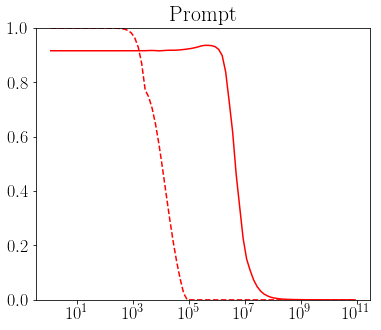

In [39]:
fig = plt.figure(figsize=(6,5))

costh = 0.6

plt.plot(caca.mceq_run.e_grid,pfp[0], label = r"$\cos\theta="+str(costh)+"$", color = "red")
plt.plot(caca.mceq_run.e_grid,
         [selfveto.correlated_passing_rate(enu,selfveto.minimum_muon_energy(selfveto.overburden(costh)),costh)
          for enu in e_grid], ls = "dashed", color = "red")
plt.semilogx()
plt.title("Prompt")
plt.ylim(0.,1.)

In [46]:
caca.mceq_run.ds.get_d_matrix(421,14)

array([[  1.44861800e-02,   2.57361102e-02,   3.51072545e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.55298484e-03,   7.32178000e-03,   2.07345780e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.25033286e-06,   9.62864165e-06,   7.21460000e-04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          7.54200000e-05,   3.63971340e-03,   1.22655755e-02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   7.54200000e-05,   3.63971340e-03],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   7.54200000e-05]])

In [44]:
caca.mceq_run.y.get_y_matrix(2212,421)

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   4.20503783e-06],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [84]:
def GetPassingFractionPrompt(costh, include_subleading = True):
    #caca=cs.CorrelatedSelfVetoProbabilityCalculator(costh,primary_cr_model=(pm.SimplePowerlaw27, None))
    caca=cs.CorrelatedSelfVetoProbabilityCalculator(costh)
    
    print "Calculating rescaled prompt yield"
    PR = GetReachingMatrix(costh)
    
    MetaYieldProtons=np.dot(caca.mceq_run.y.get_y_matrix(2212,411),caca.mceq_run.ds.get_d_matrix(411,14))
    if include_subleading:
        MetaYieldProtons+=np.dot(caca.mceq_run.y.get_y_matrix(2212,431),caca.mceq_run.ds.get_d_matrix(431,14))
        MetaYieldProtons+=np.dot(caca.mceq_run.y.get_y_matrix(2212,421),caca.mceq_run.ds.get_d_matrix(421,14))
        
    MetaYieldAntiProtons=np.dot(caca.mceq_run.y.get_y_matrix(-2212,411),caca.mceq_run.ds.get_d_matrix(411,14))
    if include_subleading:
        MetaYieldAntiProtons+=np.dot(caca.mceq_run.y.get_y_matrix(-2212,431),caca.mceq_run.ds.get_d_matrix(431,14))
        MetaYieldAntiProtons+=np.dot(caca.mceq_run.y.get_y_matrix(-2212,421),caca.mceq_run.ds.get_d_matrix(421,14))
    
    RescaledMetaYieldProtons=np.dot(MetaYieldProtons,PR)
    RescaledMetaYieldAntiProtons=np.dot(MetaYieldAntiProtons,PR)
    
    passing_guy_numerator = np.zeros(len(caca.mceq_run.e_grid))
    passing_guy_denominator = np.zeros(len(caca.mceq_run.e_grid))
    
    for idx,XX in enumerate(caca.Xvec):
        if(idx >= len(caca.Xvec) -1): continue
        height = caca.mceq_run.density_model.s_lX2h(np.log(caca.Xvec[idx]))*units.cm
        deltah = (caca.mceq_run.density_model.s_lX2h(np.log(caca.Xvec[idx])) -\
                  caca.mceq_run.density_model.s_lX2h(np.log(caca.Xvec[idx+1])))*units.cm
        # do prompt
        #inv_decay_length_array = (caca.ParticleProperties.mass_dict["D"]/(caca.mceq_run.e_grid*units.GeV))*\
        #                         (deltah/caca.ParticleProperties.lifetime_dict["D"])
            
        inv_interaction_length_array = (caca.mceq_run.cs.get_cs(2212)*units.cm**2)/(caca.mceq_run.density_model.X2rho(XX)*units.cm**3*(units.GeV/units.gr))
        
        rescale_phi=inv_interaction_length_array*caca.mceq_run.get_solution("p",0,idx)
        rescale_phi[e_grid>1.e9] =0.
        
        passing_guy_numerator+=(np.dot(RescaledMetaYieldProtons,rescale_phi))
        passing_guy_denominator+=(np.dot(MetaYieldProtons,rescale_phi))
        
        inv_interaction_length_array = (caca.mceq_run.cs.get_cs(-2212)*units.cm**2)/(caca.mceq_run.density_model.X2rho(XX)*units.cm**3*(units.GeV/units.gr))
        
        rescale_phi=inv_interaction_length_array*caca.mceq_run.get_solution("p-bar",0,idx)
        rescale_phi[e_grid>1.e9] =0.
        
        passing_guy_numerator+=(np.dot(RescaledMetaYieldAntiProtons,rescale_phi))
        passing_guy_denominator+=(np.dot(MetaYieldAntiProtons,rescale_phi))
        
    return passing_guy_numerator/passing_guy_denominator,passing_guy_numerator,passing_guy_denominator

In [88]:
GetReachingMatrix(0.5)


 35%|███▌      | 31/88 [00:06<00:11,  4.89it/s]

100%|██████████| 88/88 [00:19<00:00,  4.30it/s]


array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [85]:
guy1 = GetPassingFractionPrompt(0.5); guy2 = GetPassingFractionPrompt(0.5, include_subleading=False)

InteractionYields::_load(): Looking for /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/SIBYLL23C_yields_compact_ledpm.bz2
DecayYields:_load():: Loading file /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/decays_v1_compact.ppd

Hadrons and stable particles:

"gamma", "p", "p-bar", "n-bar", "n"

Mixed:

"pi-", "pi+", "K0L", "K-", "K+", "Lambda0", "Lambda0-bar", "K0S", 
"D+", "D-", "Ds+", "Ds-", "D0", "D0-bar"

Resonances:



Leptons:

"e-", "nue", "numu", "nutau", "antinutau", "antinumu", "antinue", "e+", 
"mu-", "mu+"

Aliases:
"obs_numu", "obs_nutau", "pr_antinutau", "pr_antinumu", "pr_antinue", "obs_antinue", "k_nue", "k_numu", 
"k_nutau", "pi_antinutau", "pi_antinue", "pi_antinumu", "pi_nue", "pi_numu", "pi_nutau", "k_antinutau", 
"k_antinumu", "k_antinue", "obs_nue", "pr_nue", "pr_numu", "pr_nutau", "obs_antinutau", "obs_antinumu", 
"k_mu-", "obs_mu-", "pr_mu+", "pi_mu+", "pi_mu-", "k_mu+", "pr_mu-", "obs_mu+"

Total number of species: 61
MCEq

  0%|          | 0/88 [00:00<?, ?it/s]

Calculating rescaled prompt yield


100%|██████████| 88/88 [00:17<00:00,  5.02it/s]
/Users/carlos/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in divide
/Users/carlos/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in divide


InteractionYields::_load(): Looking for /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/SIBYLL23C_yields_compact_ledpm.bz2
DecayYields:_load():: Loading file /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/decays_v1_compact.ppd

Hadrons and stable particles:

"gamma", "p", "p-bar", "n-bar", "n"

Mixed:

"pi-", "pi+", "K0L", "K-", "K+", "Lambda0", "Lambda0-bar", "K0S", 
"D+", "D-", "Ds+", "Ds-", "D0", "D0-bar"

Resonances:



Leptons:

"e-", "nue", "numu", "nutau", "antinutau", "antinumu", "antinue", "e+", 
"mu-", "mu+"

Aliases:
"obs_numu", "obs_nutau", "pr_antinutau", "pr_antinumu", "pr_antinue", "obs_antinue", "k_nue", "k_numu", 
"k_nutau", "pi_antinutau", "pi_antinue", "pi_antinumu", "pi_nue", "pi_numu", "pi_nutau", "k_antinutau", 
"k_antinumu", "k_antinue", "obs_nue", "pr_nue", "pr_numu", "pr_nutau", "obs_antinutau", "obs_antinumu", 
"k_mu-", "obs_mu-", "pr_mu+", "pi_mu+", "pi_mu-", "k_mu+", "pr_mu-", "obs_mu+"

Total number of species: 61
MCEq

  0%|          | 0/88 [00:00<?, ?it/s]

Calculating rescaled prompt yield


100%|██████████| 88/88 [00:17<00:00,  5.48it/s]


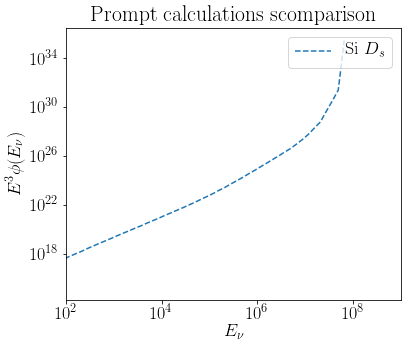

In [83]:
plt.figure(figsize=(6,5))
plt.title("Prompt calculations scomparison")
plt.plot(e_grid,guy1[0], ls = "dashed", label = r"Si $D_s$")
#plt.plot(e_grid,guy1[2]/guy2[2], ls = "dashed", label = "our integral formulae")
#plt.plot(e_grid,caca.mceq_run.get_solution("pr_numu",0,0)/guy[2], ls = "dashed", label = "our integral formulae")

plt.xlabel(r"$E_\nu$")
plt.ylabel(r"$E^3 \phi(E_\nu) $")
#plt.ylim(1.0e-15,5.0e-6)
#plt.axvline(2.e6)
plt.xlim(1.e2,1.e9)
#plt.ylim(1.e-8,2.e-4)
plt.semilogx()
plt.loglog()
plt.legend(loc = "upper right")

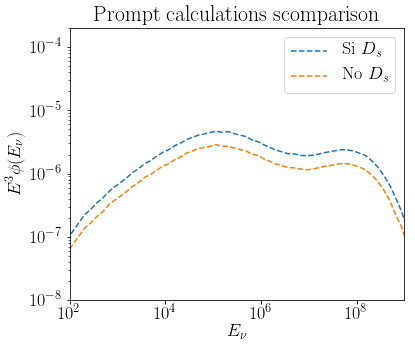

In [49]:
plt.figure(figsize=(6,5))
plt.title("Prompt calculations scomparison")
plt.plot(e_grid,guy1[2]*e_grid**3*(units.cm**3)/10., ls = "dashed", label = r"Si $D_s$")
plt.plot(e_grid,guy2[2]*e_grid**3*(units.cm**3)/10., ls = "dashed", label = r"No $D_s$")
#plt.plot(e_grid,guy1[2]/guy2[2], ls = "dashed", label = "our integral formulae")
#plt.plot(e_grid,caca.mceq_run.get_solution("pr_numu",0,0)/guy[2], ls = "dashed", label = "our integral formulae")

plt.xlabel(r"$E_\nu$")
plt.ylabel(r"$E^3 \phi(E_\nu) $")
#plt.ylim(1.0e-15,5.0e-6)
#plt.axvline(2.e6)
plt.loglog()
plt.xlim(1.e2,1.e9)
plt.ylim(1.e-8,2.e-4)
plt.semilogx()
plt.legend(loc = "upper right")

/Users/carlos/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


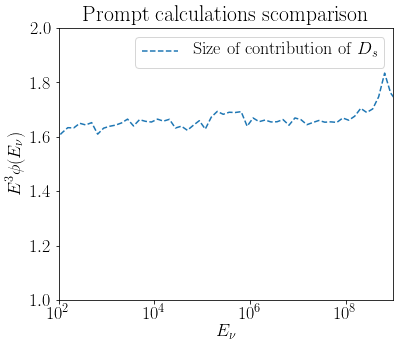

In [53]:
plt.figure(figsize=(6,5))
plt.title("Prompt calculations scomparison")
plt.plot(e_grid,guy1[2]/guy2[2], ls = "dashed", label = r"Size of contribution of $D_s$")
#plt.plot(e_grid,caca.mceq_run.get_solution("pr_numu",0,0)/guy[2], ls = "dashed", label = "our integral formulae")

plt.xlabel(r"$E_\nu$")
plt.ylabel(r"$E^3 \phi(E_\nu) $")
#plt.ylim(1.0e-15,5.0e-6)
#plt.axvline(2.e6)
#plt.loglog()
plt.xlim(1.e2,1.e9)
plt.ylim(1.,2.)
plt.semilogx()
plt.legend(loc = "upper right")

In [77]:
guy = GetPassingFractionPrompt(0.5)

InteractionYields::_load(): Looking for /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/SIBYLL23C_yields_compact_ledpm.bz2
DecayYields:_load():: Loading file /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/decays_v1_compact.ppd

Hadrons and stable particles:

"gamma", "p", "p-bar", "n-bar", "n"

Mixed:

"pi-", "pi+", "K0L", "K-", "K+", "Lambda0", "Lambda0-bar", "K0S", 
"D+", "D-", "Ds+", "Ds-", "D0", "D0-bar"

Resonances:



Leptons:

"e-", "nue", "numu", "nutau", "antinutau", "antinumu", "antinue", "e+", 
"mu-", "mu+"

Aliases:
"obs_numu", "obs_nutau", "pr_antinutau", "pr_antinumu", "pr_antinue", "obs_antinue", "k_nue", "k_numu", 
"k_nutau", "pi_antinutau", "pi_antinue", "pi_antinumu", "pi_nue", "pi_numu", "pi_nutau", "k_antinutau", 
"k_antinumu", "k_antinue", "obs_nue", "pr_nue", "pr_numu", "pr_nutau", "obs_antinutau", "obs_antinumu", 
"k_mu-", "obs_mu-", "pr_mu+", "pi_mu+", "pi_mu-", "k_mu+", "pr_mu-", "obs_mu+"

Total number of species: 61
MCEq

  1%|          | 1/88 [00:00<00:16,  5.40it/s]

Calculating rescaled prompt yield


100%|██████████| 88/88 [00:16<00:00,  5.35it/s]
/Users/carlos/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in divide
/Users/carlos/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in divide


[]

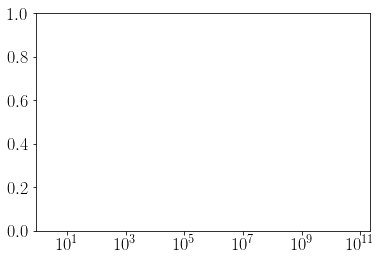

In [37]:
plt.plot(e_grid,guy[0], ls = "dashed", label = "our integral formulae")
plt.ylim(0,1)
plt.semilogx()

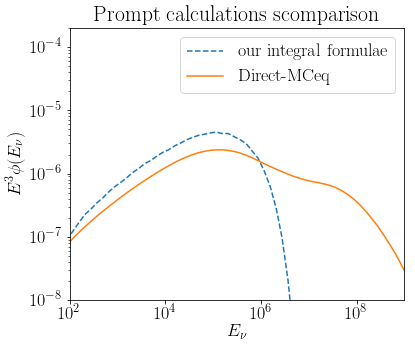

In [72]:
plt.figure(figsize=(6,5))
plt.title("Prompt calculations scomparison")
plt.plot(e_grid,guy[2]*e_grid**3*(units.cm**3)/10., ls = "dashed", label = "our integral formulae")
plt.plot(e_grid,caca.mceq_run.get_solution("pr_numu",0,0)*e_grid**3, label = "Direct-MCeq")
#plt.plot(e_grid,caca.mceq_run.get_solution("pr_numu",0,0)/guy[2], ls = "dashed", label = "our integral formulae")

plt.xlabel(r"$E_\nu$")
plt.ylabel(r"$E^3 \phi(E_\nu) $")
#plt.ylim(1.0e-15,5.0e-6)
#plt.axvline(2.e6)
plt.loglog()
plt.xlim(1.e2,1.e9)
plt.ylim(1.e-8,2.e-4)
plt.semilogx()
plt.legend(loc = "upper right")

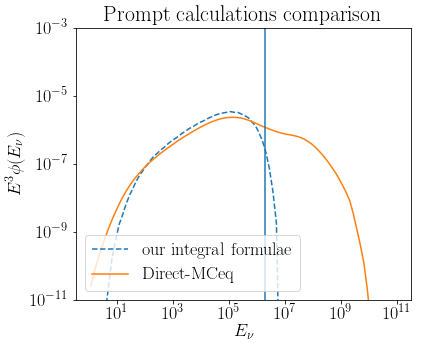

In [73]:
plt.figure(figsize=(6,5))
plt.title("Prompt calculations comparison")
plt.plot(e_grid,guy[2]*e_grid**3*(units.cm**3)/1.3/10., ls = "dashed", label = "our integral formulae")
plt.plot(e_grid,caca.mceq_run.get_solution("pr_numu",0,0)*e_grid**3, label = "Direct-MCeq")
plt.xlabel(r"$E_\nu$")
plt.ylabel(r"$E^3 \phi(E_\nu) $")
#plt.ylim(1.0e-15,1.0e-4)
plt.ylim(1.0e-11,1.0e-3)
plt.axvline(2.e6)
plt.loglog()
plt.legend(loc = "lower left")

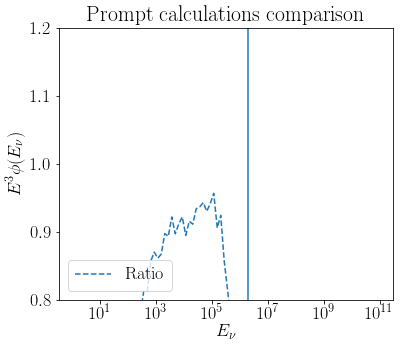

In [74]:
plt.figure(figsize=(6,5))
plt.title("Prompt calculations comparison")
plt.plot(e_grid,(guy[2]*(units.cm**3)/2./10.)/(caca.mceq_run.get_solution("pr_numu",0,0)),
         ls = "dashed", label = "Ratio")
plt.xlabel(r"$E_\nu$")
plt.ylabel(r"$E^3 \phi(E_\nu) $")
#plt.ylim(1.0e-15,1.0e-4)
plt.ylim(0.8,1.2)
plt.axvline(2.e6)
plt.semilogx()
plt.legend(loc = "lower left")

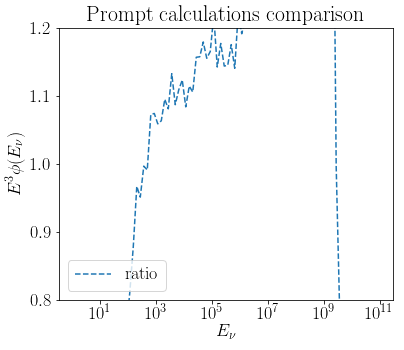

In [27]:
plt.figure(figsize=(6,5))
plt.title("Prompt calculations comparison")

y0 = guy[2]*e_grid**3*(units.cm**3)
y1 = caca.mceq_run.get_solution("pr_numu",0,0)*e_grid**3
plt.plot(e_grid,y0/y1, ls = "dashed", label = "ratio")
#plt.plot(e_grid,caca.mceq_run.get_solution("pr_numu",0,0)*e_grid**3, label = "Direct-MCeq")
plt.xlabel(r"$E_\nu$")
plt.ylabel(r"$E^3 \phi(E_\nu) $")

#plt.loglog()
plt.semilogx()
plt.ylim(0.8,1.2)
plt.legend(loc = "lower left")

In [ ]:
x_range = (e_grid/e_grid[ihijo])**-1
dNdEE = caca.mceq_run.ds.get_d_matrix(caca.ParticleProperties.pdg_id["kaon"],14)[ihijo]*e_grid/delta
end_value = dNdEE[(x_range<=1.) & (x_range>=1.0e-3)][-1]
dNdEE_KaonInterpolator = interpolate.interp1d(x_range[(x_range<=1.) & (x_range>=1.e-3)],
                     dNdEE[(x_range<=1.) & (x_range>=1.e-3)],
                     bounds_error = False, fill_value = (end_value,0.0))

In [11]:
def GetMeanMuonReachProbability(EnuMin,EnuMax,EpMin,EpMax,ice_distance):
    return integrate.dblquad(
                             lambda Ep,Enu: caca.MuonReachProbability((Ep-Enu)*units.GeV,ice_distance),
                             EnuMin,EnuMax,
                             lambda Enu: np.max([Enu,EpMin]), lambda Enu: EpMax
                             )[0]/((EpMax-EpMin)*(EnuMax-EnuMin))
                      
def GetReachingMatrix(costh):
    ice_distance=utils.overburden(costh)
    PR_matrix=np.ones((len(e_grid),len(e_grid)))
    for ipadre in tqdm.tqdm(range(len(e_grid))):
        for ihijo in range(len(e_grid)):
            EnuMin = e_grid[ihijo-1]
            EnuMax = e_grid[ihijo]
            EpMin = e_grid[ipadre-1]
            EpMax = e_grid[ipadre]
            
            PR_matrix[ihijo][ipadre] = 1.-caca.MuonReachProbability((e_grid[ipadre]-e_grid[ihijo])*units.GeV,ice_distance)
            #PR_matrix[ihijo][ipadre] = 1. - GetMeanMuonReachProbability(EnuMin,EnuMax,EpMin,EpMax,ice_distance)
            #if ihijo < ipadre:
            #    PR_matrix[ihijo][ipadre] = 1.-caca.MuonReachProbability((e_grid[ipadre]-e_grid[ihijo])*units.GeV,ice_distance)
            #elif ihijo > ipadre:
            #    PR_matrix[ihijo][ipadre] = 0. # unphysical guy
            #elif ihijo == ipadre:
            #    continue
            #    PR_matrix[ihijo][ipadre] = 1.-caca.MuonReachProbability((e_grid[ipadre])*units.GeV,ice_distance)
    return PR_matrix

[]

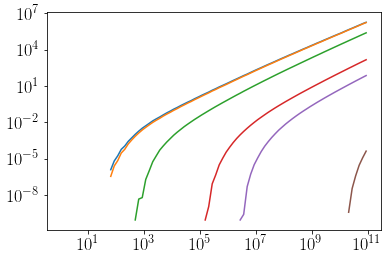

In [94]:
ihijo=1
plt.plot(e_grid,
         np.dot(caca.mceq_run.ds.get_d_matrix(411,14),caca.mceq_run.y.get_y_matrix(2212,411))[ihijo])
ihijo=5
plt.plot(e_grid,
         np.dot(caca.mceq_run.ds.get_d_matrix(411,14),caca.mceq_run.y.get_y_matrix(2212,411))[ihijo])
ihijo=20
plt.plot(e_grid,
         np.dot(caca.mceq_run.ds.get_d_matrix(411,14),caca.mceq_run.y.get_y_matrix(2212,411))[ihijo])
ihijo=40
plt.plot(e_grid,
         np.dot(caca.mceq_run.ds.get_d_matrix(411,14),caca.mceq_run.y.get_y_matrix(2212,411))[ihijo])
ihijo=50
plt.plot(e_grid,
         np.dot(caca.mceq_run.ds.get_d_matrix(411,14),caca.mceq_run.y.get_y_matrix(2212,411))[ihijo])
ihijo=80
plt.plot(e_grid,
         np.dot(caca.mceq_run.ds.get_d_matrix(411,14),caca.mceq_run.y.get_y_matrix(2212,411))[ihijo])
plt.loglog()

In [60]:
print caca.mceq_run.y[(2212,411)]

TypeError: 'InteractionYields' object has no attribute '__getitem__'

In [ ]:
print caca.mceq_run.y

In [55]:
caca.mceq_run.y?

In [52]:
caca.mceq_run.ds.get_d_matrix(411,14)

array([[  3.64715800e-02,   6.55349506e-02,   8.93518896e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  6.26302645e-03,   1.78536200e-02,   5.20949749e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.20084682e-05,   9.49516048e-05,   1.59560000e-03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.75160000e-04,   8.94766211e-03,   3.09146051e-02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   1.75160000e-04,   8.94766211e-03],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.75160000e-04]])

In [51]:
caca.mceq_run.get_solution("p",0,0)

array([  6.07040075e-01,   2.79480669e-01,   1.30383770e-01,
         6.08854165e-02,   2.83604821e-02,   1.32015621e-02,
         6.14993181e-03,   2.86767560e-03,   1.33774002e-03,
         6.24098571e-04,   2.91193669e-04,   1.35880188e-04,
         6.34133162e-05,   2.95986527e-05,   1.38179652e-05,
         6.45175977e-06,   3.01285217e-06,   1.40705922e-06,
         6.57102926e-07,   3.06895984e-07,   1.43352326e-07,
         6.69685973e-08,   3.12890372e-08,   1.46208445e-08,
         6.83303630e-09,   3.19385653e-09,   1.49306040e-09,
         6.98063909e-10,   3.26412724e-10,   1.52645309e-10,
         7.13909891e-11,   3.33911394e-11,   1.56180566e-11,
         7.30462585e-12,   3.41602092e-12,   1.59713918e-12,
         7.46427366e-13,   3.48635639e-13,   1.62692536e-13,
         7.58264114e-14,   3.52776357e-14,   1.63727655e-14,
         7.57354292e-15,   3.48756263e-15,   1.59636408e-15,
         7.24882203e-16,   3.25710268e-16,   1.44355176e-16,
         6.28583505e-17,

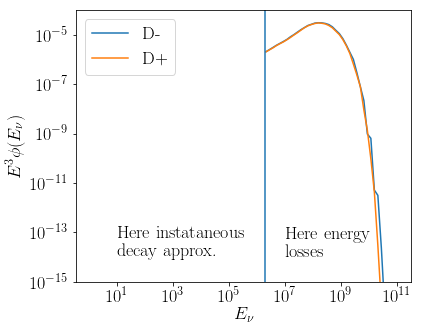

In [180]:
plt.figure(figsize=(6,5))

plt.plot(e_grid,caca.mceq_run.get_solution("D-",0,0)*e_grid**3, label = "D-")
plt.plot(e_grid,caca.mceq_run.get_solution("D+",0,0)*e_grid**3, label = "D+")

plt.axvline(2.e6)

plt.xlabel(r"$E_\nu$")
plt.ylabel(r"$E^3 \phi(E_\nu) $")
plt.ylim(1.0e-15,1.0e-4)

plt.text(10,1.e-14, "Here instataneous\n decay approx.")
plt.text(1e7,1.e-14, "Here energy\n losses")
plt.loglog()

plt.legend(loc="upper left")

In [37]:
pfp=GetPassingFractionPrompt(0.1)

InteractionYields::_load(): Looking for /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/SIBYLL23C_yields_compact_ledpm.bz2
DecayYields:_load():: Loading file /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/decays_v1_compact.ppd

Hadrons and stable particles:

"gamma", "p", "p-bar", "n-bar", "n"

Mixed:

"pi-", "pi+", "K0L", "K-", "K+", "Lambda0", "Lambda0-bar", "K0S", 
"D+", "D-", "Ds+", "Ds-", "D0", "D0-bar"

Resonances:



Leptons:

"e-", "nue", "numu", "nutau", "antinutau", "antinumu", "antinue", "e+", 
"mu-", "mu+"

Aliases:
"obs_numu", "obs_nutau", "pr_antinutau", "pr_antinumu", "pr_antinue", "obs_antinue", "k_nue", "k_numu", 
"k_nutau", "pi_antinutau", "pi_antinue", "pi_antinumu", "pi_nue", "pi_numu", "pi_nutau", "k_antinutau", 
"k_antinumu", "k_antinue", "obs_nue", "pr_nue", "pr_numu", "pr_nutau", "obs_antinutau", "obs_antinumu", 
"k_mu-", "obs_mu-", "pr_mu+", "pi_mu+", "pi_mu-", "k_mu+", "pr_mu-", "obs_mu+"

Total number of species: 61
MCEq

  0%|          | 0/88 [00:00<?, ?it/s]

Performance:   0.69ms/iteration

MCEqRun::_forward_euler(): time elapsed during integration: 1.70086097717 sec
Calculating rescaled prompt yield


100%|██████████| 88/88 [04:04<00:00,  3.35s/it]


[]

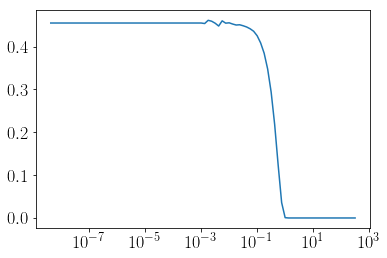

In [24]:
x_range = (e_grid/e_grid[ihijo])**-1
plt.plot(x_range,dNdEE_DInterpolator(x_range))
plt.semilogx()

## Figures

InteractionYields::_load(): Looking for /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/SIBYLL23C_yields_compact_ledpm.bz2
DecayYields:_load():: Loading file /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/decays_v1_compact.ppd

Hadrons and stable particles:

"gamma", "p", "p-bar", "n-bar", "n"

Mixed:

"pi-", "pi+", "K0L", "K-", "K+", "Lambda0", "Lambda0-bar", "K0S", 
"D+", "D-", "Ds+", "Ds-", "D0", "D0-bar"

Resonances:



Leptons:

"e-", "nue", "numu", "nutau", "antinutau", "antinumu", "antinue", "e+", 
"mu-", "mu+"

Aliases:
"obs_numu", "obs_nutau", "pr_antinutau", "pr_antinumu", "pr_antinue", "obs_antinue", "k_nue", "k_numu", 
"k_nutau", "pi_antinutau", "pi_antinue", "pi_antinumu", "pi_nue", "pi_numu", "pi_nutau", "k_antinutau", 
"k_antinumu", "k_antinue", "obs_nue", "pr_nue", "pr_numu", "pr_nutau", "obs_antinutau", "obs_antinumu", 
"k_mu-", "obs_mu-", "pr_mu+", "pi_mu+", "pi_mu-", "k_mu+", "pr_mu-", "obs_mu+"

Total number of species: 61
MCEq

  3%|▎         | 3/88 [00:00<00:05, 15.44it/s]

Performance:   0.70ms/iteration

MCEqRun::_forward_euler(): time elapsed during integration: 0.521928787231 sec
Calculating rescaled prompt yield


100%|██████████| 88/88 [04:48<00:00,  1.03it/s]


(0.0, 1.0)

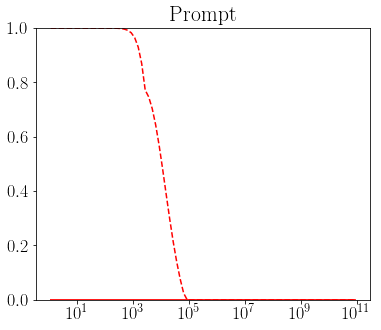

In [32]:
fig = plt.figure(figsize=(6,5))

costh = 0.6

pfp = GetPassingFractionPrompt(costh)
plt.plot(caca.mceq_run.e_grid,pfp, label = r"$\cos\theta="+str(costh)+"$", color = "red")
plt.plot(caca.mceq_run.e_grid,
         [selfveto.correlated_passing_rate(enu,selfveto.minimum_muon_energy(selfveto.overburden(costh)),costh)
          for enu in e_grid], ls = "dashed", color = "red")
plt.semilogx()
plt.title("Prompt")
plt.ylim(0.,1.)

In [34]:
pfp

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

InteractionYields::_load(): Looking for /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/SIBYLL23C_yields_compact_ledpm.bz2
DecayYields:_load():: Loading file /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/decays_v1_compact.ppd

Hadrons and stable particles:

"gamma", "p", "p-bar", "n-bar", "n"

Mixed:

"pi-", "pi+", "K0L", "K-", "K+", "Lambda0", "Lambda0-bar", "K0S", 
"D+", "D-", "Ds+", "Ds-", "D0", "D0-bar"

Resonances:



Leptons:

"e-", "nue", "numu", "nutau", "antinutau", "antinumu", "antinue", "e+", 
"mu-", "mu+"

Aliases:
"obs_numu", "obs_nutau", "pr_antinutau", "pr_antinumu", "pr_antinue", "obs_antinue", "k_nue", "k_numu", 
"k_nutau", "pi_antinutau", "pi_antinue", "pi_antinumu", "pi_nue", "pi_numu", "pi_nutau", "k_antinutau", 
"k_antinumu", "k_antinue", "obs_nue", "pr_nue", "pr_numu", "pr_nutau", "obs_antinutau", "obs_antinumu", 
"k_mu-", "obs_mu-", "pr_mu+", "pi_mu+", "pi_mu-", "k_mu+", "pr_mu-", "obs_mu+"

Total number of species: 61
MCEq

  0%|          | 0/88 [00:00<?, ?it/s]

Performance:   1.14ms/iteration

MCEqRun::_forward_euler(): time elapsed during integration: 1.8039419651 sec
Calculating rescaled kaon yield


  0%|          | 0/88 [00:00<?, ?it/s]

Calculating rescaled pion yield


100%|██████████| 88/88 [01:46<00:00,  1.19s/it]


InteractionYields::_load(): Looking for /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/SIBYLL23C_yields_compact_ledpm.bz2
DecayYields:_load():: Loading file /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/decays_v1_compact.ppd

Hadrons and stable particles:

"gamma", "p", "p-bar", "n-bar", "n"

Mixed:

"pi-", "pi+", "K0L", "K-", "K+", "Lambda0", "Lambda0-bar", "K0S", 
"D+", "D-", "Ds+", "Ds-", "D0", "D0-bar"

Resonances:



Leptons:

"e-", "nue", "numu", "nutau", "antinutau", "antinumu", "antinue", "e+", 
"mu-", "mu+"

Aliases:
"obs_numu", "obs_nutau", "pr_antinutau", "pr_antinumu", "pr_antinue", "obs_antinue", "k_nue", "k_numu", 
"k_nutau", "pi_antinutau", "pi_antinue", "pi_antinumu", "pi_nue", "pi_numu", "pi_nutau", "k_antinutau", 
"k_antinumu", "k_antinue", "obs_nue", "pr_nue", "pr_numu", "pr_nutau", "obs_antinutau", "obs_antinumu", 
"k_mu-", "obs_mu-", "pr_mu+", "pi_mu+", "pi_mu-", "k_mu+", "pr_mu-", "obs_mu+"

Total number of species: 61
MCEq

  0%|          | 0/88 [00:00<?, ?it/s]

Performance:   1.04ms/iteration

MCEqRun::_forward_euler(): time elapsed during integration: 0.97176194191 sec
Calculating rescaled kaon yield


  0%|          | 0/88 [00:00<?, ?it/s]

Calculating rescaled pion yield


100%|██████████| 88/88 [01:39<00:00,  1.29s/it]


Text(0,0.5,u'${\\rm Passing\\ Fraction}$')

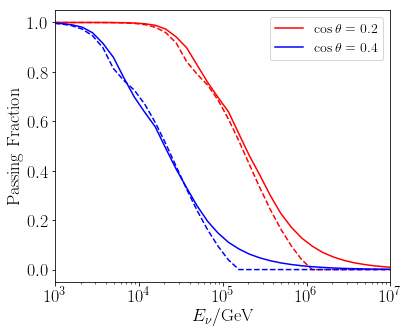

In [29]:
fig = plt.figure(figsize=(6,5))

costh = 0.2
plt.plot(caca.mceq_run.e_grid,GetPassingFraction(costh), label = r"$\cos\theta="+str(costh)+"$", color = "red")
plt.plot(caca.mceq_run.e_grid,
         [selfveto.correlated_passing_rate(enu,selfveto.minimum_muon_energy(selfveto.overburden(costh)),costh)
          for enu in e_grid], ls = "dashed", color = "red")

costh = 0.4
plt.plot(caca.mceq_run.e_grid,GetPassingFraction(costh), label = r"$\cos\theta="+str(costh)+"$", color = "blue")
plt.plot(caca.mceq_run.e_grid,
         [selfveto.correlated_passing_rate(enu,selfveto.minimum_muon_energy(selfveto.overburden(costh)),costh)
          for enu in e_grid], ls = "dashed", color = "blue")

plt.semilogx()
plt.xlim(1e3,1e7)
#plt.ylim(0.,1.)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel(r"$E_\nu/{\rm GeV}$")
plt.ylabel(r"${\rm Passing\ Fraction}$")

In [26]:
selfveto.correlated_passing_rate?

Text(0,0.5,u'${\\rm Passing\\ Fraction}$')

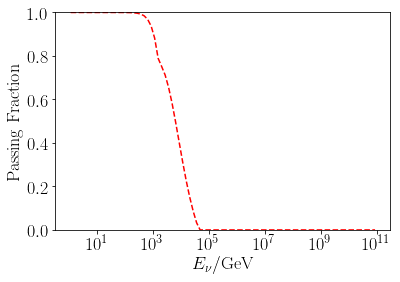

In [98]:
plt.plot(caca.mceq_run.e_grid,
         [selfveto.correlated_passing_rate(enu,selfveto.minimum_muon_energy(selfveto.overburden(1.)),1.)
          for enu in e_grid], ls = "dashed", color = "red")

plt.semilogx()
plt.ylim(0.,1.)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel(r"$E_\nu/{\rm GeV}$")
plt.ylabel(r"${\rm Passing\ Fraction}$")

In [88]:
plt.figure(figsize=(6,5))

plt.plot(caca.mceq_run.e_grid,GetPassingFraction(1.0), label = r"$\cos\theta=1$", color = "red")
plt.plot(caca.mceq_run.e_grid,GetPassingFraction(0.4), label = r"$\cos\theta=0.4$", color = "green")
plt.plot(caca.mceq_run.e_grid,GetPassingFraction(0.2), label = r"$\cos\theta=0.2$", color = "blue")

plt.plot(caca.mceq_run.e_grid,
         [selfveto.correlated_passing_rate(enu,selfveto.minimum_muon_energy(selfveto.overburden(1.)),1.)
          for enu in e_grid], ls = "dashed", color = "red")
plt.plot(caca.mceq_run.e_grid,
         [selfveto.correlated_passing_rate(enu,selfveto.minimum_muon_energy(selfveto.overburden(0.4)),0.4)
          for enu in e_grid], ls = "dashed", color = "green")
plt.plot(caca.mceq_run.e_grid,
         [selfveto.correlated_passing_rate(enu,selfveto.minimum_muon_energy(selfveto.overburden(0.2)),0.2)
          for enu in e_grid], ls = "dashed", color = "blue")

plt.semilogx()
plt.ylim(0.,1.)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel(r"$E_\nu/{\rm GeV}$")
plt.ylabel(r"${\rm Passing\ Fraction}$")
#plt.xlim(1e1,1e7)
         
#plt.plot(caca.mceq_run.e_grid,np.ones(len(caca.mceq_run.e_grid))/2.,"*")

InteractionYields::_load(): Looking for /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/SIBYLL23C_yields_compact_ledpm.bz2
DecayYields:_load():: Loading file /Users/carguelles/Library/Python/2.7/lib/python/site-packages/data/decays_v1_compact.ppd

Hadrons and stable particles:

"gamma", "p", "p-bar", "n-bar", "n"

Mixed:

"pi-", "pi+", "K0L", "K-", "K+", "Lambda0", "Lambda0-bar", "K0S", 
"D+", "D-", "Ds+", "Ds-", "D0", "D0-bar"

Resonances:



Leptons:

"e-", "nue", "numu", "nutau", "antinutau", "antinumu", "antinue", "e+", 
"mu-", "mu+"

Aliases:
"obs_numu", "obs_nutau", "pr_antinutau", "pr_antinumu", "pr_antinue", "obs_antinue", "k_nue", "k_numu", 
"k_nutau", "pi_antinutau", "pi_antinue", "pi_antinumu", "pi_nue", "pi_numu", "pi_nutau", "k_antinutau", 
"k_antinumu", "k_antinue", "obs_nue", "pr_nue", "pr_numu", "pr_nutau", "obs_antinutau", "obs_antinumu", 
"k_mu-", "obs_mu-", "pr_mu+", "pi_mu+", "pi_mu-", "k_mu+", "pr_mu-", "obs_mu+"

Total number of species: 61
MCEq

  0%|          | 0/88 [00:00<?, ?it/s]

Performance:   0.89ms/iteration

MCEqRun::_forward_euler(): time elapsed during integration: 0.572157859802 sec


 31%|███       | 27/88 [02:50<08:42,  8.56s/it]

KeyboardInterrupt: 